# Marriageability
## Exploratory Data Analysis

### 2013-2017 ACS 1-year Public Use Microdata Samples (PUMS)
### US Housing Records

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Ingestion

Using relevant variables from the Household survey: we create a smaller table with RT, SERIALNO, WGTP, HHT, PARTNER, SSMC, so that we can analyze the relationship between marriage/cohabitation/samesex and technology and family ties. For full description see [data dictionary](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2013-2017.txt).

ID variables:
1. RT Record type (H for Housing)
2. SERIALNO Serial number
3. WGTP Weight
4. HHT Household/family type
5. PARTNER Unmarried partner household
6. SSMC Same sex married couple
7. TYPE Type of unit

Technology variables: 
8. ACCESS Access to the Internet 
9. BROADBND Cellular data plan for a smartphone or other mobile device 
10. SMARTPHONE Smartphone 
11. VEH Vehicles available at location

Family fariables: 
12. FPARC Family presence and age of related children
13. MULTG Multigenerational household
14. HHL Household language

In [2]:
#Option 1: Importing ACS csv data files 
fields = ['RT', 'SERIALNO', 'WGTP', 'HHT', 'PARTNER', 'SSMC',\
            'DIVISION', 'REGION', 'ST', 'PUMA', 'NP', 'TYPE',\
            'ADJHSG', 'ADJINC', 'HINCP', 'FINCP', 'GRNTP', 'GRPIP',\
            'FES', 'WKEXREL', 'WORKSTAT',\
            'ACCESS', 'BROADBND', 'HISPEED', 'SMARTPHONE', 'VEH',\
            'FPARC', 'MULTG', 'HHL']

acs3 = pd.read_csv("../data/household/psam_husa1yr.csv", sep=',', skipinitialspace=True, header=0, usecols=fields)
acs4 = pd.read_csv("../data/household/psam_husb1yr.csv", sep=',', skipinitialspace=True, header=0, usecols=fields)

In [3]:
ACSdatahouse = pd.concat([acs3, acs4], axis=0, ignore_index=False)
print(ACSdatahouse.head())
ACSdatahouse.shape

  RT       SERIALNO  DIVISION  PUMA  REGION  ST   ADJHSG   ADJINC  WGTP  NP  \
0  H  2017000000016         6  2500       3   1  1000000  1011189   206   1   
1  H  2017000000031         6  1800       3   1  1000000  1011189    45   1   
2  H  2017000000061         6  2400       3   1  1000000  1011189   136   3   
3  H  2017000000158         6  2500       3   1  1000000  1011189    19   5   
4  H  2017000000159         6   500       3   1  1000000  1011189    21   3   

   ...  GRNTP  GRPIP  HHL  HHT     HINCP  MULTG  PARTNER  SSMC  WKEXREL  \
0  ...    NaN    NaN  1.0  4.0   10000.0    1.0      0.0   0.0      NaN   
1  ...  400.0   12.0  1.0  6.0   38500.0    1.0      0.0   0.0      NaN   
2  ...    NaN    NaN  1.0  1.0   90700.0    1.0      0.0   0.0      3.0   
3  ...  720.0   32.0  1.0  3.0   27100.0    1.0      0.0   0.0     14.0   
4  ...    NaN    NaN  2.0  1.0  122000.0    1.0      0.0   0.0      1.0   

   WORKSTAT  
0       NaN  
1       NaN  
2       3.0  
3      13.0  
4   

(1524620, 29)

In [4]:
print(f'There are {ACSdatahouse.shape[0]} instances and {ACSdatahouse.shape[1]} features')

There are 1524620 instances and 29 features


In [5]:
# looking for missing values

ACSdatahouse.describe()

,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,TYPE,...,GRNTP,GRPIP,HHL,HHT,HINCP,MULTG,PARTNER,SSMC,WKEXREL,WORKSTAT
count,1.524620e+06,1.524620e+06,1.524620e+06,1.524620e+06,1.524620e+06,1524620.0,1524620.0,1.524620e+06,1.524620e+06,1.524620e+06,...,349234.000000,341398.000000,1.243840e+06,1.243840e+06,1.243840e+06,1.243840e+06,1.243840e+06,1.243840e+06,825248.000000,818944.00000
mean,2.017001e+12,5.134476e+00,4.465417e+03,2.638597e+00,2.786385e+01,1000000.0,1011189.0,9.012561e+01,2.092351e+00,1.150677e+00,...,1137.387623,38.253613,1.336011e+00,2.705198e+00,8.599416e+04,1.037501e+00,1.679348e-01,9.999678e-03,6.306307,5.82170
std,4.436890e+05,2.473857e+00,9.152828e+03,1.012550e+00,1.592516e+01,0.0,0.0,8.033777e+01,1.500080e+00,4.814807e-01,...,649.256618,26.976938,8.063748e-01,2.026622e+00,9.425427e+04,1.899856e-01,7.262101e-01,1.405799e-01,4.600305,4.85582
min,2.017000e+12,1.000000e+00,1.000000e+02,1.000000e+00,1.000000e+00,1000000.0,1011189.0,0.000000e+00,0.000000e+00,1.000000e+00,...,4.000000,1.000000,1.000000e+00,1.000000e+00,-1.620000e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.00000
25%,2.017000e+12,3.000000e+00,8.030000e+02,2.000000e+00,1.200000e+01,1000000.0,1011189.0,4.100000e+01,1.000000e+00,1.000000e+00,...,700.000000,19.000000,1.000000e+00,1.000000e+00,3.030000e+04,1.000000e+00,0.000000e+00,0.000000e+00,2.000000,1.00000
50%,2.017001e+12,5.000000e+00,2.002000e+03,3.000000e+00,2.700000e+01,1000000.0,1011189.0,7.100000e+01,2.000000e+00,1.000000e+00,...,1000.000000,29.000000,1.000000e+00,1.000000e+00,6.060000e+04,1.000000e+00,0.000000e+00,0.000000e+00,6.000000,3.00000
75%,2.017001e+12,7.000000e+00,4.003000e+03,3.000000e+00,4.200000e+01,1000000.0,1011189.0,1.150000e+02,3.000000e+00,1.000000e+00,...,1430.000000,49.000000,1.000000e+00,4.000000e+00,1.075125e+05,1.000000e+00,0.000000e+00,0.000000e+00,9.000000,9.00000
max,2.017002e+12,9.000000e+00,7.030100e+04,4.000000e+00,5.600000e+01,1000000.0,1011189.0,1.664000e+03,2.000000e+01,3.000000e+00,...,5022.000000,101.000000,5.000000e+00,7.000000e+00,3.209000e+06,2.000000e+00,4.000000e+00,2.000000e+00,15.000000,15.00000


Some features have missings, careful when coding!

## Wrangling and EDA

**Analyzing marital status variables**: we need a feature that can identify 3 categories: not married, married heterosexual, married same sex; keeping missings. 

In [6]:
# looking at HHT
ACSdatahouse['HHT'].describe()


count    1.243840e+06
mean     2.705198e+00
std      2.026622e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      7.000000e+00
Name: HHT, dtype: float64

In [7]:
# HHT has 7 categories, we only need (0,1) = (not married, married couple household)

ACSdatahouse['HHT'].unique()

array([ 4.,  6.,  1.,  3.,  5., nan,  2.,  7.])

In [8]:
# creating new column with (0,1) = (not married, married couple household); keeping the missing values

ACSdatahouse['married'] = np.where(ACSdatahouse['HHT'].isnull(), np.nan,\
                                      np.where(ACSdatahouse['HHT'] == 1, 1, 0))

In [9]:
ACSdatahouse['married'].unique()

array([ 0.,  1., nan])

In [10]:
# We also need to know same sex married couple households from SSMC

ACSdatahouse['SSMC'].unique()

array([ 0., nan,  2.,  1.])

In [11]:
# creating new column with (0,1) = (not same sex, same sex married couple household)

ACSdatahouse['samesex'] = np.where(ACSdatahouse['SSMC'].isnull(), np.nan,\
                                      np.where(ACSdatahouse['SSMC'] > 0, 1, 0))

In [12]:
ACSdatahouse['samesex'].describe()

count    1.243840e+06
mean     5.068176e-03
std      7.101052e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: samesex, dtype: float64

In [13]:
ACSdatahouse['samesex'].unique()

array([ 0., nan,  1.])

In [14]:
# married_type = (0,1,2) = (not married, married heterosexual, married same sex)

ACSdatahouse['marital_status_house'] = np.where(ACSdatahouse['married'].isnull(), np.nan,\
                                           np.where(ACSdatahouse['married']== 0, 0,\
                                                    np.where(ACSdatahouse['samesex']== 0, 1, 2)))

In [15]:
married_count = ACSdatahouse['marital_status_house'].value_counts()
print(married_count)

1.0    627673
0.0    609863
2.0      6304
Name: marital_status_house, dtype: int64


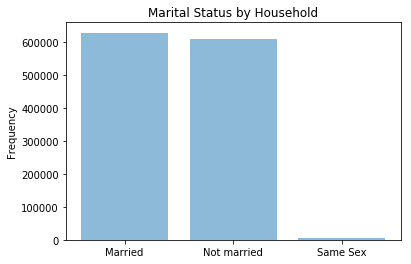

In [16]:
objects = ('Married', 'Not married', 'Same Sex')
y_pos = np.arange(len(objects))

plt.bar(y_pos, married_count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Marital Status by Household')

plt.show()

Same sex households are so few, will add them back to married couple households.

In [17]:
# married_type = (0,1,2) = (not married, married heterosexual, married same sex)

ACSdatahouse['marital_status'] = np.where(ACSdatahouse['marital_status_house'].isnull(), np.nan,\
                                           np.where(ACSdatahouse['marital_status_house']== 0, 0, 1))


In [18]:
married_count = ACSdatahouse['marital_status'].value_counts()
print(married_count)

1.0    633977
0.0    609863
Name: marital_status, dtype: int64


**Analyzing family related variables**: First, recode FPARC, MULTG and HHL. Then create smaller table to find correlation between married_type and whether there are kids in the family, multigenerational household and language.

In [30]:
# recoding FPARC = Family presence and age of related children

ACSdatahouse['FPARC'].describe()

count    825248.000000
mean          3.167317
std           1.056349
min           1.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           4.000000
Name: FPARC, dtype: float64

In [31]:
ACSdatahouse['FPARC'].unique()

array([nan,  2.,  3.,  1.,  4.])

In [32]:
# family = (0,1) = (no related children, related children)

ACSdatahouse['family'] = np.where(ACSdatahouse['FPARC'].isnull(), np.nan,\
                                     np.where(ACSdatahouse['FPARC'] == 4, 0, 1))

In [33]:
ACSdatahouse['family'].value_counts()

0.0    480118
1.0    345130
Name: family, dtype: int64

In [34]:
# recoding MULTG to (0,1) = (not multigenerational household, multigenerational household)

ACSdatahouse['MULTG'].describe()

count    1.243840e+06
mean     1.037501e+00
std      1.899856e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+00
Name: MULTG, dtype: float64

In [35]:
ACSdatahouse['multigen'] = np.where(ACSdatahouse['MULTG'].isnull(), np.nan,\
                                       np.where(ACSdatahouse['MULTG'] == 1, 0, 1))

In [36]:
ACSdatahouse['multigen'].value_counts()

0.0    1197195
1.0      46645
Name: multigen, dtype: int64

In [37]:
# recoding language (1,2,3) = (english, spanish, other)

ACSdatahouse['language'] = np.where(ACSdatahouse['HHL'].isnull(), np.nan,\
                                       np.where(ACSdatahouse['HHL'] == 1, 1,\
                                                np.where(ACSdatahouse['HHL'] == 2, 2, 3)))

In [38]:
ACSdatahouse['language'].value_counts()

1.0    1006888
2.0     127181
3.0     109771
Name: language, dtype: int64

In [39]:
household_family = ACSdatahouse[['marital_status', 'family', 'multigen', 'language']]

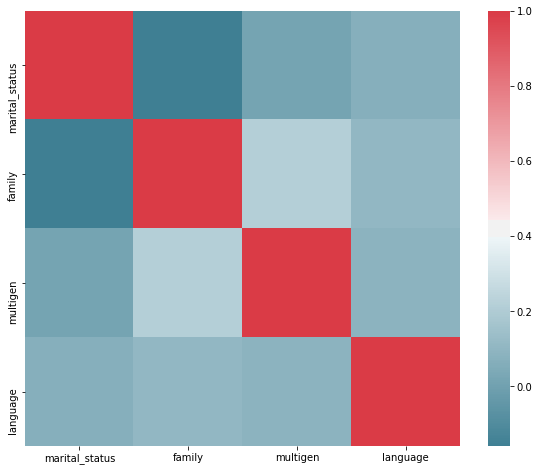

In [40]:
f, ax = plt.subplots(figsize=(10, 8))
corr = household_family.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Marital status is not correlated with language, multigenerational household or kids in the household.

**Analyzing technology related variables**: ACCESS', 'BROADBND', 'HISPEED', 'SMARTPHONE', 'VEH' will be transformed into binary. Will create smaller table to find correlation between married_type (not married, married hetero, married same sex) and technology variables.

In [41]:
# recoding ACCESS

ACSdatahouse['ACCESS'].describe()

count    1.243840e+06
mean     1.282476e+00
std      6.785030e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: ACCESS, dtype: float64

In [43]:
ACSdatahouse['ACCESS'].unique()

array([ 3.,  1., nan,  2.])

In [44]:
# internet access = 1, no internet access = 0

ACSdatahouse['internet'] = np.where(ACSdatahouse['ACCESS'].isnull(), np.nan,\
                                     np.where(ACSdatahouse['ACCESS'] == 3, 0, 1))

In [45]:
ACSdatahouse['internet'].value_counts()

1.0    1083582
0.0     160258
Name: internet, dtype: int64

In [46]:
# recoding BROADBND

ACSdatahouse['BROADBND'].describe()

count    1.052743e+06
mean     1.136721e+00
std      3.435527e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+00
Name: BROADBND, dtype: float64

In [47]:
ACSdatahouse['BROADBND'].unique()

array([nan,  1.,  2.])

In [48]:
# broadband = 1, no broadband = 0

ACSdatahouse['broadband'] = np.where(ACSdatahouse['BROADBND'].isnull(), np.nan,\
                                     np.where(ACSdatahouse['BROADBND'] == 2, 0, 1))

In [49]:
ACSdatahouse['broadband'].value_counts()

1.0    908811
0.0    143932
Name: broadband, dtype: int64

In [50]:
# recoding SMARTPHONE

ACSdatahouse['SMARTPHONE'].describe()

count    1.243840e+06
mean     1.199742e+00
std      3.998065e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+00
Name: SMARTPHONE, dtype: float64

In [51]:
ACSdatahouse['SMARTPHONE'].unique()

array([ 2.,  1., nan])

In [52]:
# smartphone = 1, no smartphone = 0

ACSdatahouse['smartphone'] = np.where(ACSdatahouse['SMARTPHONE'].isnull(), np.nan,\
                                     np.where(ACSdatahouse['SMARTPHONE'] == 2, 0, 1))

In [53]:
ACSdatahouse['smartphone'].value_counts()

1.0    995393
0.0    248447
Name: smartphone, dtype: int64

In [54]:
ACSdatahouse['VEH'].describe()

count    1.243840e+06
mean     1.869480e+00
std      1.100383e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: VEH, dtype: float64

In [55]:
ACSdatahouse['VEH'].unique()

array([ 1.,  3.,  6.,  2., nan,  4.,  5.,  0.])

In [56]:
# has one or more vehicles = 1, no vehicles = 0

ACSdatahouse['vehicles'] = np.where(ACSdatahouse['VEH'].isnull(), np.nan,\
                                     np.where(ACSdatahouse['VEH'] == 0, 0, 1))

In [57]:
ACSdatahouse['vehicles'].value_counts()

1.0    1150819
0.0      93021
Name: vehicles, dtype: int64

In [58]:
household_technology = ACSdatahouse[['marital_status', 'internet', 'broadband', 'smartphone', 'vehicles']]

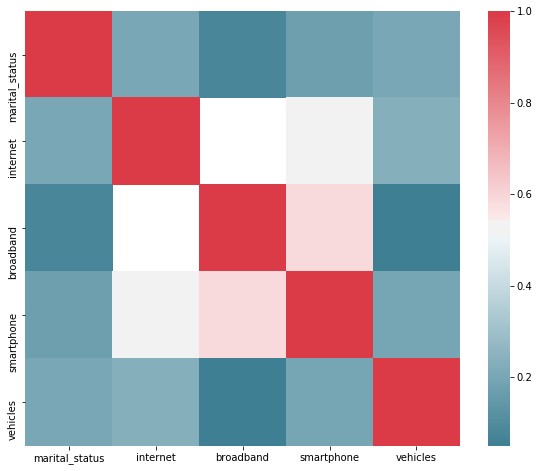

In [59]:
f, ax = plt.subplots(figsize=(10, 8))
corr = household_technology.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

We observe some correlationbetween internet, broadband and smartphone, but not with marital status.

## Table to join with population 

In [61]:
ACShousehold = ACSdatahouse[['RT', 'SERIALNO', 'TYPE',\
                             'marital_status',\
                             'internet', 'broadband', 'smartphone', 'vehicles',\
                             'family', 'multigen', 'language']]

In [62]:
ACShousehold.head()

,RT,SERIALNO,TYPE,marital_status,internet,broadband,smartphone,vehicles,family,multigen,language
0,H,2017000000016,1,0.0,0.0,NaN,0.0,1.0,NaN,0.0,1.0
1,H,2017000000031,1,0.0,1.0,1.0,1.0,1.0,NaN,0.0,1.0
2,H,2017000000061,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
3,H,2017000000158,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,H,2017000000159,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0


In [63]:
#Exporting ACShousehold to csv
ACShousehold.to_csv(r'../data/ACShousehold.csv')

In [64]:
##### END OF CODE #####